ALFRED FOLI
11365899

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np



# Load the IoT Network Intrusion dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT Network Intrusion Dataset.csv')

# Select relevant features and target
relevant_features = ['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
                     'TotLen_Bwd_Pkts', 'Flow_Byts/s', 'Flow_Pkts/s', 'Pkt_Len_Min',
                     'Pkt_Len_Max', 'Label']

# Encode the target variable before selecting features to avoid warnings
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Label'])

# Select the relevant features, including the target
data_selected = data[relevant_features]

# Replace infinite values with NaN
data_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
data_selected.dropna(inplace=True)

# Split data into features and labels
X = data_selected.drop('Label', axis=1)
y = data_selected['Label']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




<ipython-input-2-ae444e7f5fe1>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-2-ae444e7f5fe1>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.dropna(inplace=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten



def evaluate_model(model, X_test, y_test, threshold=0.3):  # Lowering threshold
    y_pred = (model.predict(X_test) > threshold).astype("int32")



def create_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))  # Increased filters
    model.add(Conv1D(128, kernel_size=3, activation='relu'))  # Added another Conv1D layer
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Increased neurons
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



def create_fcnn(input_shape):
    model = Sequential()
    model.add(Dense(256, input_shape=input_shape, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Increased neurons
    model.add(Dropout(0.4))  # Adjusted dropout rate
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model




# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create models
cnn_model = create_cnn((X_train_cnn.shape[1], 1))
fcnn_model = create_fcnn((X_train.shape[1],))

# Train the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

# Train the FCNN model
fcnn_history = fcnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 139s 9ms/step - accuracy: 0.9582 - loss: 0.1878 - val_accuracy: 0.9741 - val_loss: 0.0968
Epoch 2/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 133s 9ms/step - accuracy: 0.9740 - loss: 0.1060 - val_accuracy: 0.9790 - val_loss: 0.0810
Epoch 3/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 142s 9ms/step - accuracy: 0.9780 - loss: 0.0892 - val_accuracy: 0.9820 - val_loss: 0.0723
Epoch 4/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 130s 8ms/step - accuracy: 0.9798 - loss: 0.0837 - val_accuracy: 0.9728 - val_loss: 0.0808
Epoch 5/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 134s 9ms/step - accuracy: 0.9806 - loss: 0.0799 - val_accuracy: 0.9810 - val_loss: 0.0755
Epoch 6/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 143s 9ms/step - accuracy: 0.9808 - loss: 0.0773 - val_accuracy: 0.9824 - val_loss: 0.0770
Epoch 7/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 135s 8ms/step - accuracy: 0.9816 - loss: 0.0750 - val_accuracy: 0.9834 - val_loss: 0.0690
Epoch 8/10
15636/15636 ━━━━━━━━━━━━━━━━━━━━ 126s 8ms/step - ac

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

def evaluate_model(model, X_test, y_test):
    # Predict and threshold the predictions at 0.5
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_test, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred)

    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1': f1,
        'auc': auc,
        'mcc': mcc
    }

# Evaluate CNN model
cnn_metrics = evaluate_model(cnn_model, X_test_cnn, y_test)
print("CNN Metrics:", cnn_metrics)

# Evaluate FCNN model
fcnn_metrics = evaluate_model(fcnn_model, X_test, y_test)
print("FCNN Metrics:", fcnn_metrics)


3909/3909 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
CNN Metrics: {'accuracy': 0.9839226753435719, 'sensitivity': 0.7718062762540153, 'specificity': 0.9985981588012548, 'f1': 0.8613581523612547, 'auc': 0.8852022175276352, 'mcc': 0.8594801864628341}
3909/3909 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
FCNN Metrics: {'accuracy': 0.9536068050814259, 'sensitivity': 0.29478626142821845, 'specificity': 0.9991879578421903, 'f1': 0.45125295508274227, 'auc': 0.6469871096352043, 'mcc': 0.5186820282912997}


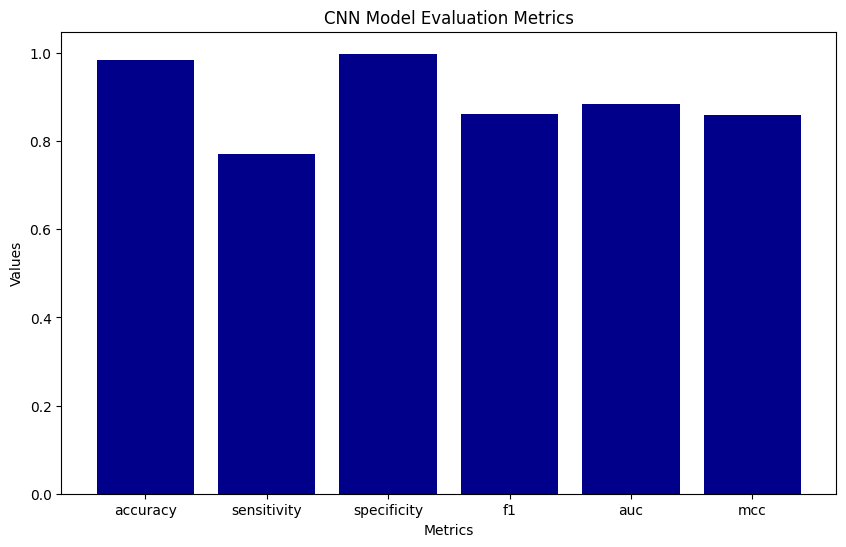

In [ ]:

import matplotlib.pyplot as plt

# Extract the metrics values
cnn_values = list(cnn_metrics.values())

# Define the labels for the bar chart
labels = list(cnn_metrics.keys())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, cnn_values, color='darkblue')

# Add labels and title
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("CNN Model Evaluation Metrics")

plt.savefig('CNN.png')

# Display the chart
plt.show()




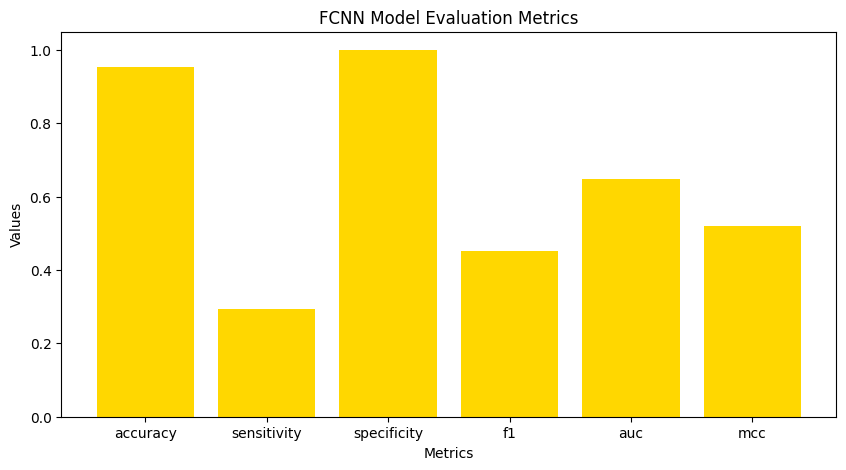

In [ ]:

import matplotlib.pyplot as plt

# Extract the metrics values
fcnn_values = list(fcnn_metrics.values())

# Define the labels for the bar chart
labels = list(fcnn_metrics.keys())

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, fcnn_values, color='gold')  # Deep yellow color

# Add labels and title
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("FCNN Model Evaluation Metrics")
plt.savefig('FCNN.png')
# Display the chart
plt.show()


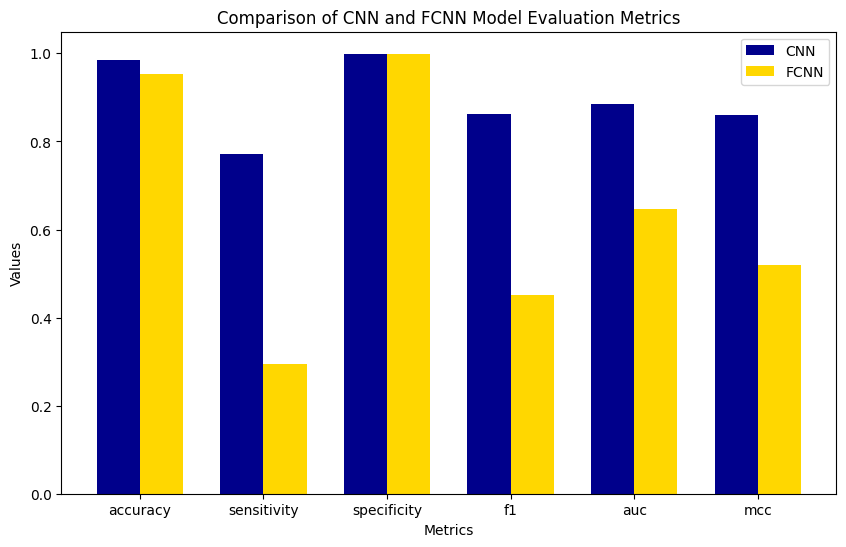

In [ ]:

import matplotlib.pyplot as plt

# Extract the metrics values
cnn_values = list(cnn_metrics.values())
fcnn_values = list(fcnn_metrics.values())

# Define the labels for the bar chart
labels = list(cnn_metrics.keys())

# Create the bar chart
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, cnn_values, width, color='darkblue', label='CNN')
rects2 = ax.bar([i + width for i in x], fcnn_values, width, color='gold', label='FCNN')

# Add labels and title
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison of CNN and FCNN Model Evaluation Metrics")
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('CNN&FCNN.png')
# Display the chart
plt.show()
